### <p style="text-align: right;"> &#9989; Jacob Jensen
<p style="text-align: right;"> &#9989; Dave Yonkers, Adam Romund, John Romig, Luke Layman, Kyleigh Phillips

# Day 6 In-class Assignment: Visualizing projectile motion and population growth

We've already spent a bit of time in this course thinking about the trajectory of a perfectly timed snowball, which is a particular example of **projectile motion**. Basically, if something is launched in a particular direction and travels just under the force of gravity, the motion is pretty predictable. So far we haven't been able to visualize that motion -- that changes today!

In this assignment you're going to work to **visualize projectile motion as well the growth of the human population as a function of time**.  This should give you a good foundation for modeling many of our future projects!

<img src="https://i.imgur.com/kbKDC2Z.jpg" width=600px>

<img src="https://futuresplanning.files.wordpress.com/2010/07/populationgrowthhistory2.jpg" width=600px>

## Learning Goals:

By the end of this assignment you should be able to:

* Use the math module in Python to compute values that can be used in computational models for real-world phenomena.
* Use matplotlib to visualize your models.
* Customize matplotlib plots to maximize the information they provide.

---
## Part 1: Modeling and visualizing projectile motion

Previously in class, we used an equation for a snowball's vertical motion as a function of time solely under the influence of gravity.  Now we're going to think about the equations that govern projectile motion in two dimensions (think: basketball shot, cannonball motion, the dirt biker jumping off the ramp above, etc).  We can model this motion in the $x$ and $y$ directions with the following equations:

$$x(t) = v_{0}t\cos(\theta)$$
$$y(t) = v_{0}t\sin(\theta) - \frac{1}{2}gt^2$$

where $v_0$ is the magnitude of the initial velocity in meters per second, $\theta$ is the angle that that the projectile is launched at in radians, $g$ is the acceleration due to gravity in meters per seconds-squared, and $t$ is the time in seconds.

Notice that without air resistance, the equation of motion in the $x$-direction is just the velocity in the $x$-direction multiplied by time because there is nothing to slow the projectile down in that direction. In the $y$-direction we see that familiar $-\frac{1}{2}gt^2$ term, which is the effect of gravity pulling down on the projectile in the $y$-direction.

**Write a function** that takes an initial velocity magnitude, a launch angle, and a **list** of times in seconds and **computes and returns the $x$-position and $y$-position** as a function of time. **Hint**: you'll need to use the math module to access the $\sin$ and $\cos$ functions. You can also use the `math` module to convert from degrees to radians!

In [25]:
import math

def Motion2D (v0=0, theta=45, time_list = [0,1]):
    xPos = []
    yPos = []
    for t in time_list:
        x_t = v0 * t * math.cos(math.radians(theta))
        y_t = (v0 * t * math.sin(math.radians(theta))) - (0.5 * 9.8 * (t**2))
        
        xPos.append(x_t)
        yPos.append(y_t)
        
    return xPos, yPos
        

Using your function, **compute the $x$ (range) and $y$ (height) positions** for a projectile launched with an **initial velocity of 500 m/s** at **an angle of 60 degrees**. Compute the motion for a total of **100 seconds at 1 second intervals**. Once you have your values from your function, **make three plots** using matplotlib: 

1. $x$ (range) as a function of time
2. $y$ (height) as a function of time
3. $y$ (height) vs. $x$ (range).

(**Note**: the common convention is that when we plot "y" versus "x" this means that the y-values go on the y-axis and x-values go on the x-axis. Of course, you need to remember that when you make a plot using the matplotlib `plot()` command, the x-axis values are listed *first* and the the y-axis values are listed *second*.)

### Plot requirements
Each plot must have:

1. A plot title
2. An $x$-axis label
3. A $y$-axis label

**Remember** in order to make plots, you need to import the `pyplot` module from `matplotlib`. You also need a special line of code to make the plots show up. If you can't remember the right commands, talk with your group to figure it out!

**Important note**: By default, every time you call `plt.plot()` the plot will be added to whatever the current `matplotlib` figure is. In order to make the plots show up separately, **put each plot call in a separate cell for now**. We'll figure out a better ways to deal with multiple plots soon.

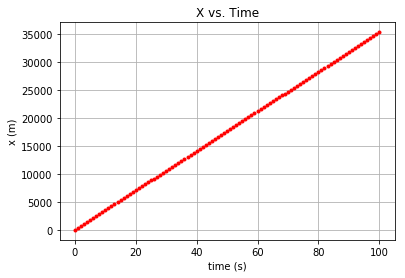

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

v_0 = 500
angle = 45


t0 = 0
tf = 100
dt = 1
t_list = []

while t0 <= tf:
    t_list.append(t0)
    t0 += dt

x_list, y_list = Motion2D(v_0, angle, t_list)

plt.plot(t_list, x_list, "r.")
plt.title('X vs. Time')
plt.xlabel('time (s)')
plt.ylabel('x (m)')
plt.grid()
plt.show()

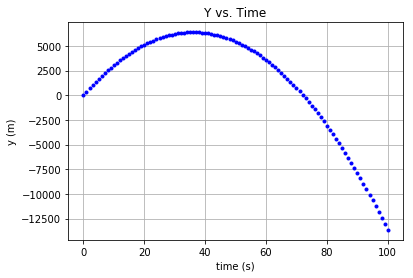

In [75]:
plt.plot(t_list, y_list, "b.")
plt.title('Y vs. Time')
plt.xlabel('time (s)')
plt.ylabel('y (m)')
plt.grid()
plt.show()

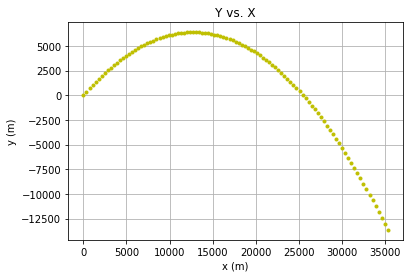

In [100]:
plt.plot(x_list, y_list, "y.")
plt.title('Y vs. X')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.grid()
plt.show()

**Question**: At roughly what time does the projectile impact the ground, if we assume the ground to be where $y=0$? <br>
>**Hint**: Try adding a `plt.grid()` after your plot commands to add a grid to the plot. This can be helpful for seeing where the zero point is.

At roughly 84s, the projectile hits the ground.

**Question**: Roughly how far in the $x$-direction does the projectile travel in that amount of time?

The projectile travels roughly 22000m in the x direction

**Question**: Try changing the angle to see how the distance that the projectile travels changes. What angle will make the projectile go the furthest in the $x$ direction?

A 45 degree angle will give the max x distance.

### Putting all of the plots in the same figure using `subplots()`

`matplotlib` comes with a handy way to put mutiple plots in the same figure. The function that does this is called `subplots` and is part of the `pyplot` module. The command for making a `subplots` figure is something like this:

`figure, axes = plt.subplots(3,1)`

The above command creates and returns a `figure` with 3 plots in it arranged in 3 rows and 1 columns, which can be accessed with the `axes` variable. The `axes` variable is actually an array (which you can think of as a list for now) of axis objects where plots can be made.  The following bit of code provides an example of how the `subplots` function can be used. **Make sure you read and understand what the code is doing!**

You may also find this page of `subplots` examples useful: https://matplotlib.org/examples/pylab_examples/subplots_demo.html 

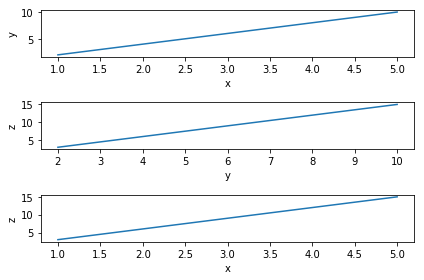

In [101]:
xpoints = [1,2,3,4,5]
ypoints = [2,4,6,8,10]
zpoints = [3,6,9,12,15]

figure, axes = plt.subplots(3,1)

axes[0].plot(xpoints,ypoints)
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[1].plot(ypoints,zpoints)
axes[1].set_xlabel('y')
axes[1].set_ylabel('z')
axes[2].plot(xpoints,zpoints)
axes[2].set_xlabel('x')
axes[2].set_ylabel('z')

plt.tight_layout()

Notice how each of the above three plots are made. The axes variable can be indexed just like a list and each plot is made using the `plot` function and a different index value for the `axes` variable. The syntax for setting the axis labels is a little bit different than just using normal `plt` calls, so make sure you look carefully at that.

**Question**: What does the last command, `plt.tight_layout()` in the example code do? Try commenting it out to see how it changes things.

It lays out the plots so that they do not overlap with one another.

### Reproducing your projectile motion plots from above

Now you're going to use the `subplots` function to reproduce your projectile motion plots from above so that they are all on the same figure. Try to do the following:

1. Make a `subplots` figure with the 3 plots **all in one row horizontally**. Your three plots you should be:
    - $x$ vs time
    - $y$ vs time
    - $y$ vs $x$
    
2. Use a *different line color* for each plot.
3. Use a *thick, dashed line* for the $y$ vs $x$ plot.
4. Label all of your plots appropriately.
5. Make sure each plots contains a grid by using the `grid()` function.

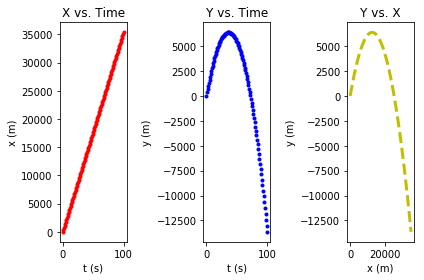

In [102]:
f, axes = plt.subplots(1,3)

axes[0].plot(t_list, x_list, "r.")
axes[0].set_xlabel('t (s)')
axes[0].set_ylabel('x (m)')
axes[0].set_title('X vs. Time')

axes[1].plot(t_list, y_list, "b.")
axes[1].set_xlabel('t (s)')
axes[1].set_ylabel('y (m)')
axes[1].set_title('Y vs. Time')

axes[2].plot(x_list, y_list, "y--", linewidth = 3)
axes[2].set_xlabel('x (m)')
axes[2].set_ylabel('y (m)')
axes[2].set_title('Y vs. X')

plt.tight_layout()

---
## Part 2: Modeling and visualizing population growth

Now that we've spent a while looking at projectile motion, we're going to model another evolving system -- the human population. One possible model for population growth is called a *logistic model*. For this model, the growth of the population as a function of time, $t$, can be modeled using the following equation:

$$P(t) = \frac{K}{1 + Ae^{-kt}}$$

where 

$$A = \frac{K-P_{0}}{P_{0}}$$

The variable $K$ represents the *carrying capacity* of the population, which is the maximum population that the environment can sustain, and $k$ is the relative growth rate coefficient. $P_{0}$ is the initial value of the population at $t=0$.

Remember that the exponential, $e$, can be computed using the math module, `math.exp()`.

**Write a function** that takes a **list** of times in years, an initial population, $P_{0}$, a carrying capacity, $K$, and a relative growth rate, $k$, and **returns** a list of the corresponding population values.

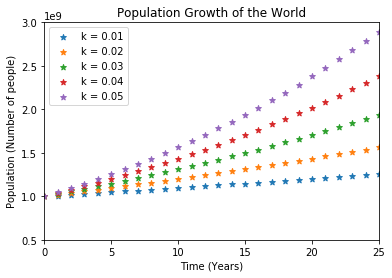

In [137]:
#Finds population values given a time list and appropriate constants
def popGrowth (time_list, P0, K, k):
    P_list = []
    A = (K - P0)/P0
    
    for t in time_list:
        P_t = K / (1 + (A * math.exp(-k * t)))
        P_list.append(P_t)
        
    return P_list
#Initialize variables
K_main = 12000000000
P0_main = 1000000000

t0 = 0
tf = 300
dt = 1
t_list = []

k_list = [0.01, 0.02, 0.03, 0.04, 0.05]

#Create a time list
while t0 <= tf:
    t_list.append(t0)
    t0 += dt
#For each k value, find its population growth and plot it on the same graph.
for k in k_list:
    P_list_k = popGrowth(t_list, P0_main, K_main, k)
    plt.scatter(t_list, P_list_k, marker = '*', label = 'k = ' + str(k))

#Plot formatting
plt.title('Population Growth of the World')
plt.xlabel('Time (Years)')
plt.ylabel('Population (Number of people)')
plt.legend(loc = 'upper left')
plt.xlim(0,25)
plt.ylim(500000000,3000000000)
plt.show()    


Let's assume for now that **the carrying capacity, $K$, is 12 billion** and that we'll start with an **initial population of 1 billion**, which was roughly the population in 1800.

Using your function, **model the population growth for a total of 300 years** for five values of $k$. Specifically, compute the models for:

$k =$ 0.01, 0.02, 0.03, 0.04, and 0.05

You can assume a time step size of 1 year.

Put the lines for **all five** growth models on the **same plot**. Use `plt.legend()` to add a legend to the plot so that you know which line is which. You'll want to use the `label` parameter in your plot command to make sure the legend has the appropriate labels for the lines.

**Make sure to add appropriate axis labels and a plot title.**

**Question**: Do the population models behave as you would expect? Specifically, for the larger values of $k$, does it approach, but not exceed the carrying capacity, $K$?

For larger values of k, the population approaches K faster, which is what I would have expected

**Question**: If the human population was roughly 7 billion in 2012, what would be the value of $k$ that would most closely match that population at that time given the current parameters of the model?

The k = 0.02 value matches closely, although k = 0.01 is also very close. 

### Plot modifications

Now, modify your plot in the following ways:

1. Instead of plotting each model as a line, plot the models as individual points without lines connecting the points. Use the "star" symbol for the points. **Hint**: this can be done with both the standard `plot` function as well as with the `scatter` function.
2. Rescale the $x$ and $y$ range of the plot so that you only see the first 25 years of values on the $x$-axis and a population range of 0.5 billion to 3 billion on the $y$-axis. **Hint**: you'll want to use the `xlim` and `ylim` functions in `pyplot`.

**Make sure you still include the legend in your plot and that the axes have appropriate labels!**

---

## Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "In-class assignments" folder, find the submission link for Day 6, and upload it there.

See you next class!

&#169; Copyright 2018,  Michigan State University Board of Trustees